In [24]:
import numpy as np
from matplotlib import pyplot as plt
from data import data_utils 
import math

In [25]:
def RMSE(trueVal, predictedVal): 
    return np.sqrt(((trueVal - predictedVal) ** 2).mean())

In [26]:
x_train, x_valid, x_test, y_train, y_valid, y_test = data_utils.load_dataset('rosenbrock', n_train=1000, d=2)


x_train = np.vstack([x_train,x_valid])
y_train = np.vstack([y_train,y_valid])


U,S,V=np.linalg.svd(x_train,full_matrices=False)

# S = S.reshape((S.shape[0], 1))
S = np.diag(S)
# U = U[:,:S.shape[0]]

print(S.shape)
print(V.shape)
print(x_train.shape)
print(U.shape)
print('test')
print(V.shape)
print(S.shape)
print(U.shape)
print(y_train.shape)



w = V @ np.linalg.inv(S)
print(w.shape)
w= w @  U.T 
w= w @ y_train


ytrain = x_train @w
ytest = x_test @w



(2, 2)
(2, 2)
(2000, 2)
(2000, 2)
test
(2, 2)
(2, 2)
(2000, 2)
(2000, 1)
(2, 2)


In [27]:
def RMSE(trueVal, predictedVal): 
    error = np.sqrt(((trueVal - predictedVal).T @ (trueVal- predictedVal)))/trueVal.shape[0]
    return error

In [28]:
ytrainError = RMSE(y_train, ytrain)
ytestError = RMSE(y_test, ytest)
    
print('Training Error:',ytrainError )
print('Testing Error:',ytestError )

Training Error: [[0.02189857]]
Testing Error: [[0.03111956]]


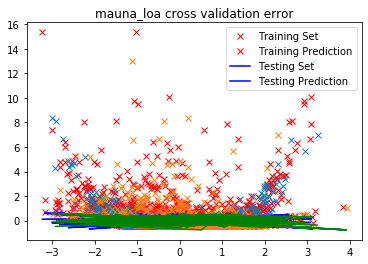

In [21]:
plt.plot(x_train,y_train,'rx',x_train,ytrain,'b',x_test,y_test,'x',x_test,ytest,'g')
plt.legend(['Training Set', 'Training Prediction', 'Testing Set', 'Testing Prediction'])
plt.title('mauna_loa cross validation error')
plt.show()

